# MANTENIMIENTO PREDICTIVO EN MOTORES DE AVIÓN

# RANDOM FOREST

Conjunto de múltiples árboles entrenados.

Reduce la varianza y es robusto.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [3]:
df= pd.read_csv('../data/processed/datos_normalizados.csv', delimiter=',')

df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s17,s18,s19,s20,s21,failure_cycle,is_failure_cycle,RUL,label1,label2
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.333333,0.0,0.0,0.713178,0.724662,112,0,191.0,0,0
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.333333,0.0,0.0,0.666667,0.731014,112,0,190.0,0,0
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.166667,0.0,0.0,0.627907,0.621375,112,0,189.0,0,0
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.333333,0.0,0.0,0.573643,0.662386,112,0,188.0,0,0
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.416667,0.0,0.0,0.589147,0.704502,112,0,187.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.477011,0.250000,0.0,0.0,0.686747,0.587312,0.782917,0.0,...,0.750000,0.0,0.0,0.271318,0.109500,20,0,4.0,1,2
20627,100,197,0.408046,0.083333,0.0,0.0,0.701807,0.729453,0.866475,0.0,...,0.583333,0.0,0.0,0.124031,0.366197,20,0,3.0,1,2
20628,100,198,0.522989,0.500000,0.0,0.0,0.665663,0.684979,0.775321,0.0,...,0.833333,0.0,0.0,0.232558,0.053991,20,0,2.0,1,2
20629,100,199,0.436782,0.750000,0.0,0.0,0.608434,0.746021,0.747468,0.0,...,0.583333,0.0,0.0,0.116279,0.234466,20,0,1.0,1,2


In [4]:
class_counts = df['label2'].value_counts()
class_counts

label2
0    17531
2     1600
1     1500
Name: count, dtype: int64

In [5]:
cols_a_borrar = ['setting1', 'setting2', 'setting3', 's1','s5','s6','s9','s10','s16', 's18', 's19', 'failure_cycle','is_failure_cycle']
df_red = df.drop(columns=cols_a_borrar)
df_red

,id,cycle,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label1,label2
0,1,1,0.183735,0.406802,0.309757,0.726248,0.242424,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191.0,0,0
1,1,2,0.283133,0.453019,0.352633,0.628019,0.212121,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190.0,0,0
2,1,3,0.343373,0.369523,0.370527,0.710145,0.272727,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189.0,0,0
3,1,4,0.343373,0.256159,0.331195,0.740741,0.318182,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188.0,0,0
4,1,5,0.349398,0.257467,0.404625,0.668277,0.242424,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4.0,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3.0,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2.0,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1.0,1,2


In [6]:
df_red['cumcount'] = df_red.groupby('id').cumcount()
df_filtered = df_red[df_red['cumcount'] >= df_red['cumcount'].max() * 0.2]
df_filtered = df_filtered.drop(columns='cumcount')
df_filtered

,id,cycle,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label1,label2
73,1,74,0.527108,0.296708,0.324612,0.673108,0.257576,0.434524,0.759062,0.132353,0.168903,0.340900,0.333333,0.511628,0.673571,118.0,0,0
74,1,75,0.225904,0.245912,0.212188,0.603865,0.257576,0.220238,0.656716,0.338235,0.155795,0.527895,0.333333,0.581395,0.632284,117.0,0,0
75,1,76,0.301205,0.396119,0.281735,0.613527,0.181818,0.351190,0.616205,0.220588,0.188358,0.287418,0.166667,0.682171,0.757526,116.0,0,0
76,1,77,0.403614,0.332679,0.316003,0.766506,0.242424,0.333333,0.620469,0.294118,0.182217,0.492882,0.416667,0.658915,0.525822,115.0,0,0
77,1,78,0.234940,0.211903,0.368839,0.582931,0.272727,0.327381,0.765458,0.411765,0.175302,0.209311,0.333333,0.573643,0.627451,114.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4.0,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3.0,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2.0,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1.0,1,2


In [7]:
class_counts = df_filtered['label2'].value_counts()
class_counts

label2
0    10231
2     1600
1     1500
Name: count, dtype: int64

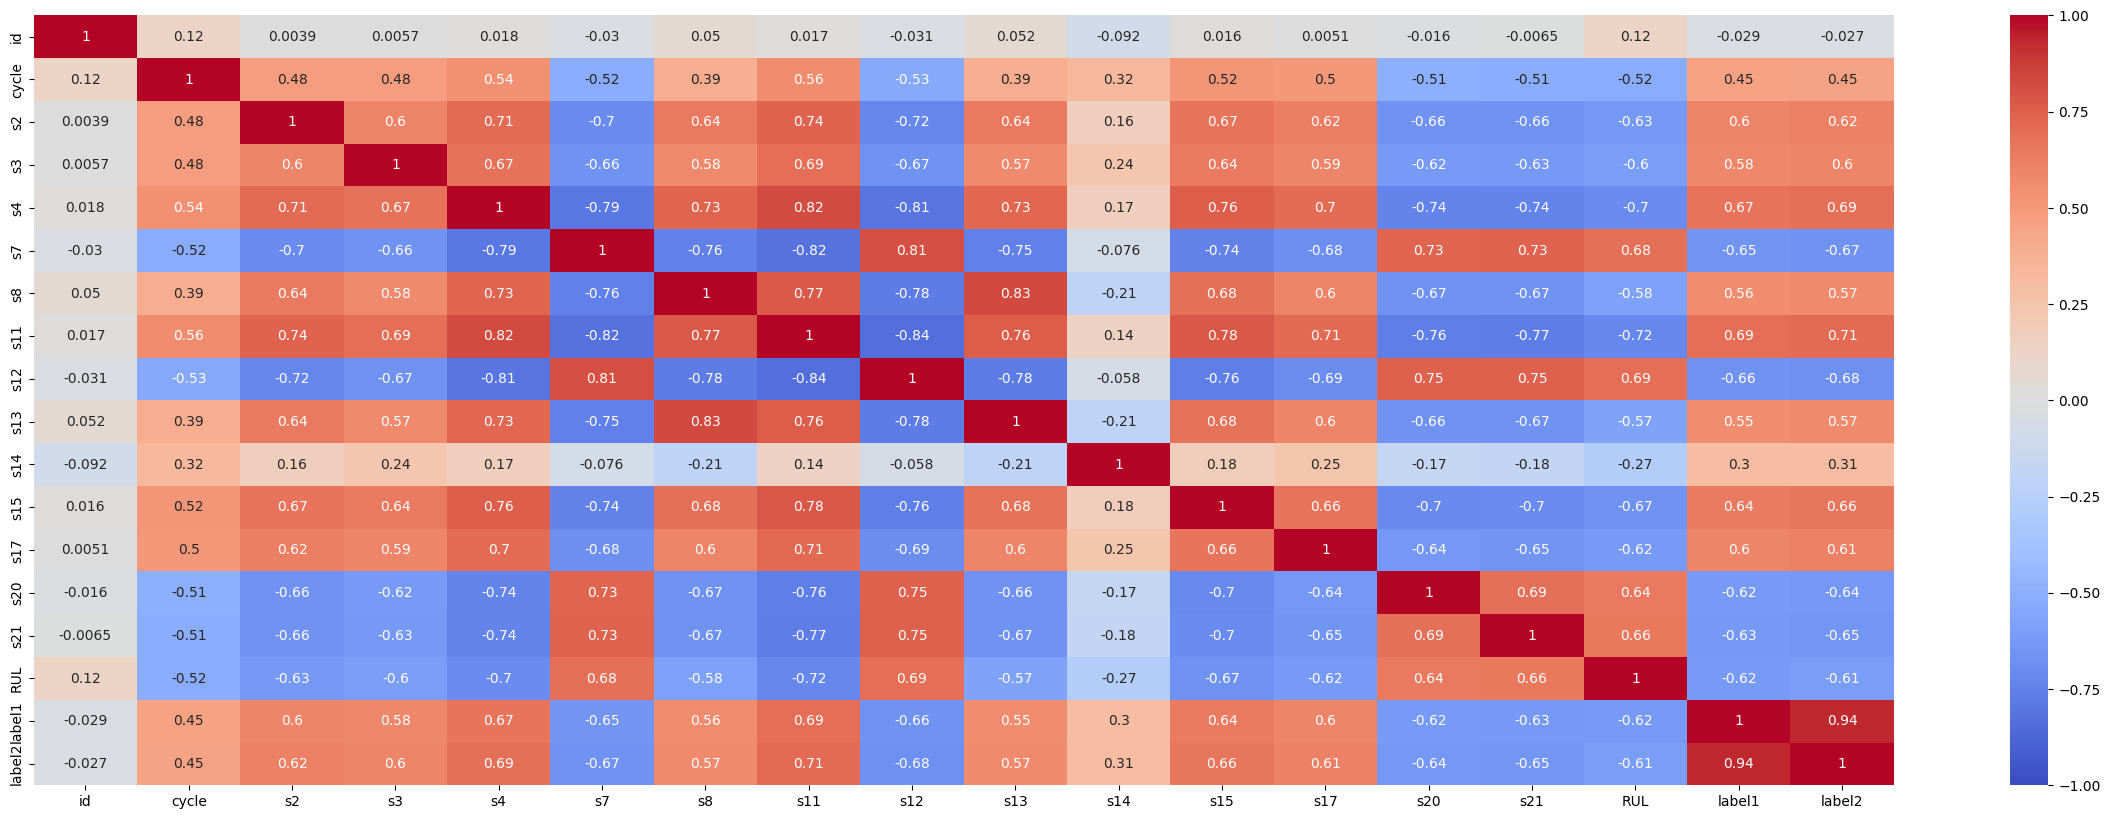

In [8]:
plt.figure(figsize=[30,10])
sns.heatmap (df_filtered.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

In [9]:
X = df_filtered.drop(columns=['id', 'cycle', 'label1', 'label2', 'RUL'])
y = df_filtered['label2']

In [10]:
X

,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21
73,0.527108,0.296708,0.324612,0.673108,0.257576,0.434524,0.759062,0.132353,0.168903,0.340900,0.333333,0.511628,0.673571
74,0.225904,0.245912,0.212188,0.603865,0.257576,0.220238,0.656716,0.338235,0.155795,0.527895,0.333333,0.581395,0.632284
75,0.301205,0.396119,0.281735,0.613527,0.181818,0.351190,0.616205,0.220588,0.188358,0.287418,0.166667,0.682171,0.757526
76,0.403614,0.332679,0.316003,0.766506,0.242424,0.333333,0.620469,0.294118,0.182217,0.492882,0.416667,0.658915,0.525822
77,0.234940,0.211903,0.368839,0.582931,0.272727,0.327381,0.765458,0.411765,0.175302,0.209311,0.333333,0.573643,0.627451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,0.686747,0.587312,0.782917,0.254428,0.439394,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500
20627,0.701807,0.729453,0.866475,0.162641,0.500000,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197
20628,0.665663,0.684979,0.775321,0.175523,0.515152,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991
20629,0.608434,0.746021,0.747468,0.133655,0.530303,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)

(10664, 13)
(10664,)


In [ ]:
# Modelo
rf = RandomForestClassifier(random_state=42)

In [24]:
# Parámetros para Grid Search
param_grid = {
    "n_estimators": [100, 200,300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "bootstrap": [True, False]
}

# Grid Search con validación cruzada de 3 pliegues
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=1)




In [27]:
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [28]:
# Mejor modelo
best_rf = grid_search.best_estimator_



In [29]:
# se evalua con test
y_pred = best_rf.predict(X_test)
print("Mejor combinación de parámetros:")
print(grid_search.best_params_)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))



Mejor combinación de parámetros:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2039
           1       0.68      0.54      0.60       327
           2       0.84      0.85      0.85       301

    accuracy                           0.91      2667
   macro avg       0.82      0.79      0.80      2667
weighted avg       0.90      0.91      0.90      2667



Precisión: 0.9073865766779152
[[1987   48    4]
 [ 107  177   43]
 [   8   37  256]]


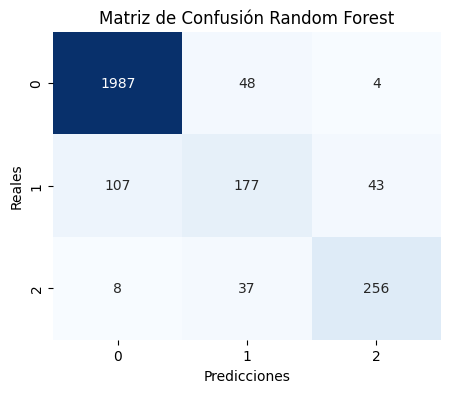

In [35]:
# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
#print(f'Precisión: {accuracy * 100:.2f}%')
print('Precisión:', accuracy)
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualizar matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['0', '1', '2'], 
            yticklabels=['0', '1', '2'])
plt.title('Matriz de Confusión Random Forest')
plt.xlabel('Predicciones')
plt.ylabel('Reales')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [31]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Entrenar directamente con los mejores parámetros
rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=400,
    random_state=42
)

rf.fit(X_train, y_train)

# Guardar como modelo final
with open("../models/modelo_RandomForest.pkl", "wb") as f:
    pickle.dump(rf, f)



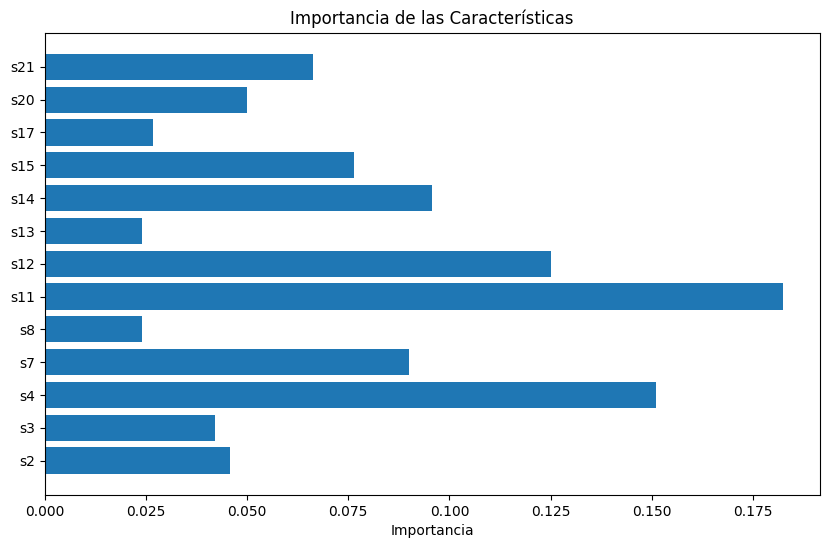

In [32]:
# Obtener importancia de las características
importances = rf.feature_importances_

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), X.columns)
plt.xlabel('Importancia')
plt.title('Importancia de las Características')
plt.show()



ROC AUC (multiclass OvR): 0.967


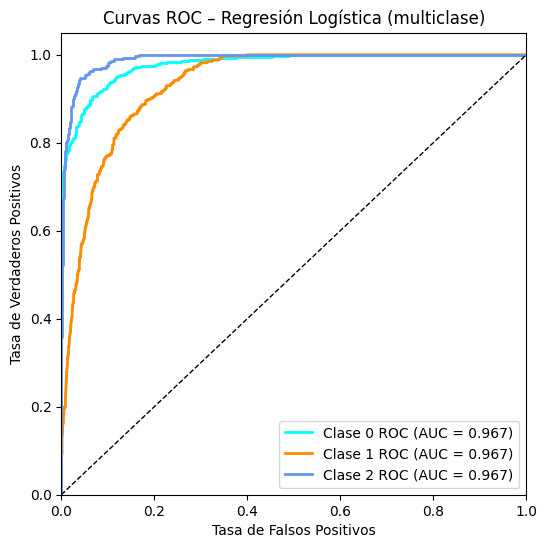

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score  


probas = rf.predict_proba(X_test)  # shape (n_samples, 3)

# ROC AUC global (One-vs-Rest) y curvas por clase
auc_score = roc_auc_score(y_test, probas, multi_class='ovr')  
print(f"ROC AUC (multiclass OvR): {auc_score:.3f}")

# Curvas individuales
fpr = dict()
tpr = dict()
n_classes = probas.shape[1]  
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probas[:, i])

# curvas ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Clase {i} ROC (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC – Regresión Logística (multiclase)')
plt.legend(loc='lower right')
plt.show()
